In [1]:
import pandas as pd
import json
from yaml import load
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Genero un diccionario en el que cada llave contiene la base de datos del año respectivo
info = {'2016': None,'2017': None,'2018': None,'2019': None,'2020': None,'2021': None}

In [4]:
with open('data2016.json') as json_file:
  data = json.load(json_file)
archivo = pd.DataFrame(data)
info['2016']= archivo
del archivo
data.clear()

In [5]:
with open('data2017.json') as json_file:
  data = json.load(json_file)
archivo = pd.DataFrame(data)
info['2017']= archivo
del archivo
data.clear()

In [6]:
with open('data2018.json') as json_file:
  data = json.load(json_file)
archivo = pd.DataFrame(data)
info['2018']= archivo
del archivo
data.clear()

In [7]:
with open('data2019.json') as json_file:
  data = json.load(json_file)
archivo = pd.DataFrame(data)
info['2019']= archivo
del archivo
data.clear()

In [8]:
with open('data2020.json') as json_file:
  data = json.load(json_file)
archivo = pd.DataFrame(data)
info['2020']= archivo
del archivo
data.clear()

In [9]:
with open('data2021.json') as json_file:
  data = json.load(json_file)
archivo = pd.DataFrame(data)
info['2021']= archivo
del archivo
data.clear()

In [33]:
del archivo

In [34]:
# Creo un solo dataset de todos los años
archivo = pd.concat([info["2016"], info["2017"],info["2018"],info["2019"],info["2020"],info["2021"]], axis=1, join='inner')

In [35]:
archivo

,https://www.whoscored.com/Matches/1043033/Live/Argentina-Liga-Profesional-2016-Belgrano-Atletico-Tucuman,https://www.whoscored.com/Matches/1042915/Live/Argentina-Liga-Profesional-2016-San-Lorenzo-Arsenal-Sarandi,https://www.whoscored.com/Matches/1042940/Live/Argentina-Liga-Profesional-2016-San-Lorenzo-Rosario-Central,https://www.whoscored.com/Matches/1042947/Live/Argentina-Liga-Profesional-2016-San-Martin-San-Juan-Argentinos-Juniors,https://www.whoscored.com/Matches/1042990/Live/Argentina-Liga-Profesional-2016-Patronato-de-Parana-Atletico-Rafaela,https://www.whoscored.com/Matches/1042827/Live/Argentina-Liga-Profesional-2016-Argentinos-Juniors-Tigre,https://www.whoscored.com/Matches/1043021/Live/Argentina-Liga-Profesional-2016-Arsenal-Sarandi-Defensa-y-Justicia,https://www.whoscored.com/Matches/1042917/Live/Argentina-Liga-Profesional-2016-Gimnasia-LP-Quilmes,https://www.whoscored.com/Matches/1042956/Live/Argentina-Liga-Profesional-2016-Boca-Juniors-Atletico-Rafaela,https://www.whoscored.com/Matches/1042942/Live/Argentina-Liga-Profesional-2016-Temperley-Argentinos-Juniors,...,https://www.whoscored.com/Matches/1559781/Live/Argentina-Liga-Profesional-2021-Newell-s-Old-Boys-Estudiantes,https://www.whoscored.com/Matches/1559521/Live/Argentina-Liga-Profesional-2021-Independiente-Colon,https://www.whoscored.com/Matches/1559498/Live/Argentina-Liga-Profesional-2021-Godoy-Cruz-Union,https://www.whoscored.com/Matches/1559676/Live/Argentina-Liga-Profesional-2021-Racing-Club-Sarmiento,https://www.whoscored.com/Matches/1559684/Live/Argentina-Liga-Profesional-2021-Banfield-Talleres,https://www.whoscored.com/Matches/1559529/Live/Argentina-Liga-Profesional-2021-Sarmiento-Atletico-Tucuman,https://www.whoscored.com/Matches/1559472/Live/Argentina-Liga-Profesional-2021-River-Plate-Union,https://www.whoscored.com/Matches/1559522/Live/Argentina-Liga-Profesional-2021-Racing-Club-Central-Cordoba-de-Santiago,https://www.whoscored.com/Matches/1559727/Live/Argentina-Liga-Profesional-2021-Gimnasia-LP-Velez-Sarsfield,https://www.whoscored.com/Matches/1559713/Live/Argentina-Liga-Profesional-2021-Patronato-de-Parana-Talleres
matchId,1043033,1042915,1042940,1042947,1042990,1042827,1043021,1042917,1042956,1042942,...,1559781,1559521,1559498,1559676,1559684,1559529,1559472,1559522,1559727,1559713
matchCentreData,{'playerIdNameDictionary': {'80097': 'Sebastiá...,{'playerIdNameDictionary': {'125445': 'Juan Me...,{'playerIdNameDictionary': {'14391': 'Fernando...,{'playerIdNameDictionary': {'125332': 'Marcos ...,{'playerIdNameDictionary': {'36945': 'Mauricio...,{'playerIdNameDictionary': {'117939': 'Federic...,{'playerIdNameDictionary': {'89999': 'Fernando...,{'playerIdNameDictionary': {'133833': 'Maximil...,{'playerIdNameDictionary': {'43042': 'Juan Ins...,{'playerIdNameDictionary': {'21743': 'Ariel Có...,...,{'playerIdNameDictionary': {'15268': 'Ignacio ...,{'playerIdNameDictionary': {'43042': 'Juan Ins...,{'playerIdNameDictionary': {'125243': 'Damián ...,{'playerIdNameDictionary': {'410221': 'Ignacio...,{'playerIdNameDictionary': {'302986': 'Facundo...,{'playerIdNameDictionary': {'37361': 'Federico...,{'playerIdNameDictionary': {'13743': 'Javier P...,{'playerIdNameDictionary': {'14838': 'Darío Cv...,{'playerIdNameDictionary': {'125345': 'Matías ...,{'playerIdNameDictionary': {'125448': 'Matías ...
matchCentreEventTypeJson,"{'shotSixYardBox': 0, 'shotPenaltyArea': 1, 's...","{'shotSixYardBox': 0, 'shotPenaltyArea': 1, 's...","{'shotSixYardBox': 0, 'shotPenaltyArea': 1, 's...","{'shotSixYardBox': 0, 'shotPenaltyArea': 1, 's...","{'shotSixYardBox': 0, 'shotPenaltyArea': 1, 's...","{'shotSixYardBox': 0, 'shotPenaltyArea': 1, 's...","{'shotSixYardBox': 0, 'shotPenaltyArea': 1, 's...","{'shotSixYardBox': 0, 'shotPenaltyArea': 1, 's...","{'shotSixYardBox': 0, 'shotPenaltyArea': 1, 's...","{'shotSixYardBox': 0, 'shotPenaltyArea': 1, 's...",...,"{'shotSixYardBox': 0, 'shotPenaltyArea': 1, 's...","{'shotSixYardBox': 0, 'shotPenaltyArea': 1, 's...","{'shotSixYardBox': 0, '

In [12]:
gol = {}
#Creo un diccionario donde cada llave son los equipos

In [32]:
archivo['']['matchCentreData']['home']['name']

'San Lorenzo'

In [36]:
for ele in archivo:
  local = archivo[ele]['matchCentreData']['home']['name']
  if local not in gol.keys():
    gol[local]= {'goles':0,'partidos':0,'ganados':0,'perdidos':0,'empatados':0}
  visitante = archivo[ele]['matchCentreData']['away']['name']
  if visitante not in gol.keys():
    gol[visitante]= {'goles':0,'partidos':0,'ganados':0,'perdidos':0,'empatados':0}

In [37]:
#Sumo los goles en cada equipo
for ele in archivo:
  df2 = archivo[ele]['matchCentreData']
  local = df2['home']['name']
  gollocal = df2['score'][0]
  visitante = df2['away']['name']
  golvisita = df2['score'][4]
  # Sumo los goles en el diccionario
  gol[local]['goles'] = gol[local]['goles'] + int(gollocal)
  gol[visitante]['goles']=gol[visitante]['goles'] + int(golvisita)
  #Sumo los partidos en el diccionario
  gol[local]['partidos'] = gol[local]['partidos'] + 1
  gol[visitante]['partidos']=gol[visitante]['partidos'] + 1
  # Sumo las victorias, empates y perdidas
  if gollocal > golvisita:
   gol[local]['ganados'] = gol[local]['ganados'] + 1
   gol[visitante]['perdidos']=gol[visitante]['perdidos'] + 1
  elif gollocal < golvisita:
   gol[local]['perdidos'] = gol[local]['perdidos'] + 1
   gol[visitante]['ganados']=gol[visitante]['ganados'] + 1
  else:
   gol[local]['empatados'] = gol[local]['empatados'] + 1
   gol[visitante]['empatados']=gol[visitante]['empatados'] + 1  

In [38]:
# Lo paso a dataaframe
tabla = pd.DataFrame.from_dict(gol).T
# Le pongo nombre a la primera columna
tabla.index.name = 'Equipos'
#tabla.rename(columns = {'':'Equipo'},inplace = True)
tabla.head()

,goles,partidos,ganados,perdidos,empatados
Equipos,,,,,
Belgrano,87,98,23,38,37
Atletico Tucuman,159,136,48,46,42
San Lorenzo,166,137,58,40,39
Arsenal Sarandi,110,111,29,52,30
Rosario Central,156,136,44,49,43


In [39]:
# Veo cuales son los equipos mas goleadores
tabla.sort_values(by='goles',ascending = False).iloc[:,[0]].head()

,goles
Equipos,
River Plate,223
Boca Juniors,220
Racing Club,210
Godoy Cruz,176
Defensa y Justicia,174


<AxesSubplot:title={'center':'Equipos más goleadores'}, xlabel='Equipos'>

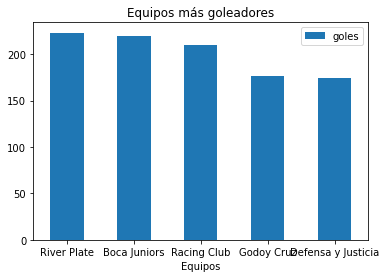

In [40]:
goleadores = tabla.sort_values(by='goles',ascending = False).iloc[:,[0]].head()
goleadores.plot.bar(rot=0,title = 'Equipos más goleadores')

In [41]:
goleadores

,goles
Equipos,
River Plate,223
Boca Juniors,220
Racing Club,210
Godoy Cruz,176
Defensa y Justicia,174


In [42]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

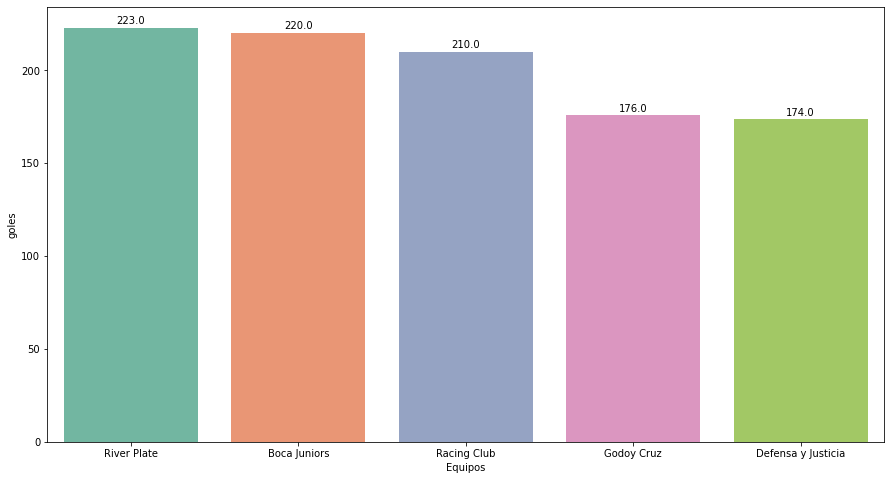

In [65]:
goleadores['Equipos'] = goleadores.index
plt.figure(figsize=(15,8))
sns.set_color_codes('pastel')
ax = sns.barplot(x = 'Equipos',
            y = 'goles',
            data = goleadores,
            palette = 'Set2')
show_values(ax)
 
# Show the plot
plt.show()

In [52]:
#Gráfico de performance de partidos
perf = tabla.sort_values(by='goles',ascending = False).head()
perf

,goles,partidos,ganados,perdidos,empatados
Equipos,,,,,
River Plate,223,136,70,32,34
Boca Juniors,220,136,76,24,36
Racing Club,210,136,67,28,41
Godoy Cruz,176,137,61,55,21
Defensa y Justicia,174,136,64,36,36


<Figure size 216x72 with 0 Axes>

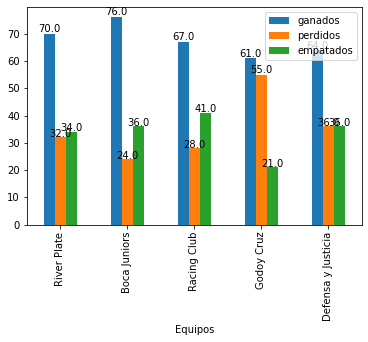

In [105]:
plt.figure(figsize=(3,1))
ax =perf.plot(x="Equipos", y=["ganados", "perdidos",'empatados'], kind="bar")
show_values(ax)
plt.show()

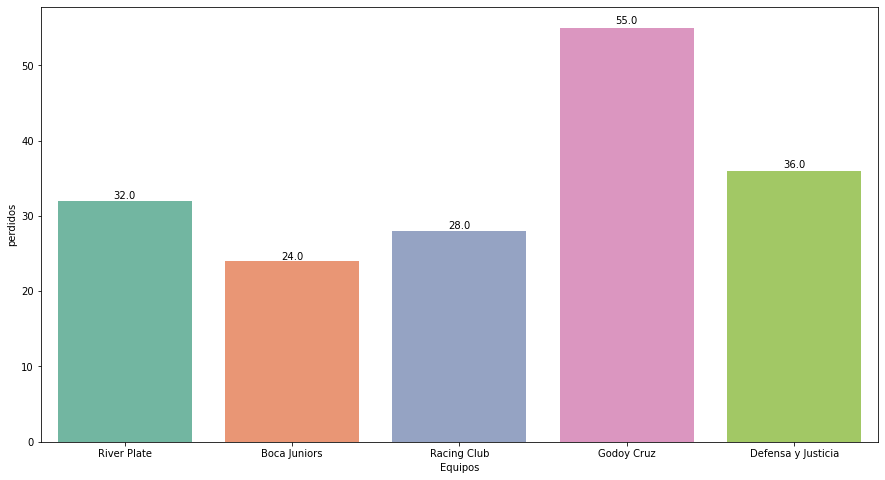

In [66]:
perf['Equipos'] = goleadores.index
plt.figure(figsize=(15,8))
sns.set_color_codes('pastel')
ax = sns.barplot(x = 'Equipos',
            y = 'perdidos',
            #hue='ganados',
            data = perf,
            palette = 'Set2')
show_values(ax)
 
# Show the plot
plt.show()

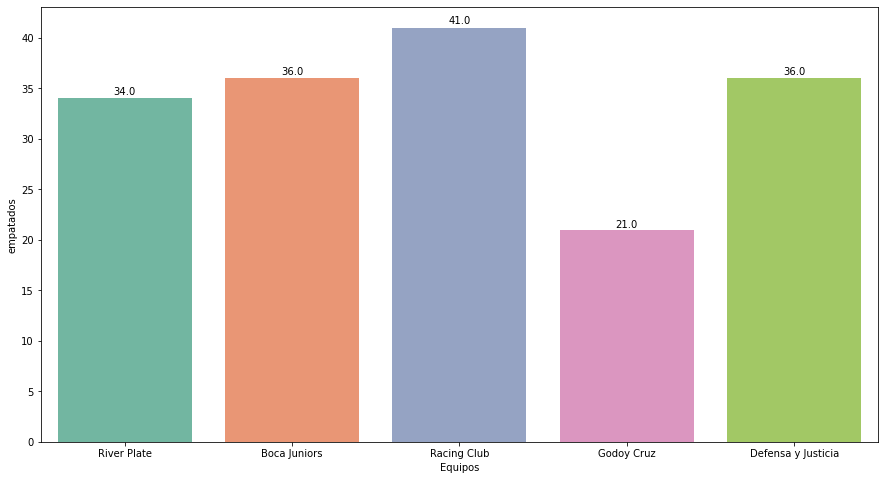

In [67]:
perf['Equipos'] = goleadores.index
plt.figure(figsize=(15,8))
sns.set_color_codes('pastel')
ax = sns.barplot(x = 'Equipos',
            y = 'empatados',
            #hue='ganados',
            data = perf,
            palette = 'Set2')
show_values(ax)
 
# Show the plot
plt.show()